In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as ny # linear algebra
import pandas as ps # data processing, CSV file I/O (e.g. pd.read_csv)
import time
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
dataset = ps.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
dataset.shape

(400, 5)

In [6]:
dataset = dataset[['Age', 'EstimatedSalary', 'Purchased']]
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
x = dataset.iloc[:, 0:2]
y = dataset.iloc[:, -1]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xscaled = scaler.fit_transform(x)
xscaled

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [11]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((320, 2), (320,), (80, 2), (80,))

In [12]:
import tensorflow as tw
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense (10, activation = 'relu', input_dim = 2))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


2022-12-27 23:16:54.195684: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
#Batch Gradient descent Setup
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
start = time.time()
batchTraininglog = model.fit(xtrain, ytrain, epochs = 20, batch_size = 320)
print(time.time() - start)

2022-12-27 23:16:54.474472: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 121.4603 - accuracy: 0.6531
Epoch 2/20
1/1 [==============================] - 0s 10ms/step - loss: 66.0256 - accuracy: 0.6531
Epoch 3/20
1/1 [==============================] - 0s 5ms/step - loss: 30.7317 - accuracy: 0.6531
Epoch 4/20
1/1 [==============================] - 0s 4ms/step - loss: 7.4857 - accuracy: 0.6531
Epoch 5/20
1/1 [==============================] - 0s 4ms/step - loss: 3.0645 - accuracy: 0.6531
Epoch 6/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6966 - accuracy: 0.3375
Epoch 7/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.3375
Epoch 8/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6949 - accuracy: 0.3375
Epoch 9/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6944 - accuracy: 0.3469
Epoch 10/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.3469
Epoch 11/20
1/1 [==================

In [15]:
#Stochastic Gradient descent Setup
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
start = time.time()
stochasticTraininglog = model.fit(xtrain, ytrain, epochs = 20, batch_size = 1)
print(time.time() - start)

Epoch 1/20
320/320 [==============================] - 1s 2ms/step - loss: 0.6855 - accuracy: 0.6531
Epoch 2/20
320/320 [==============================] - 1s 2ms/step - loss: 0.6745 - accuracy: 0.6531
Epoch 3/20
320/320 [==============================] - 1s 3ms/step - loss: 0.6664 - accuracy: 0.6531
Epoch 4/20
320/320 [==============================] - 1s 3ms/step - loss: 0.6604 - accuracy: 0.6531
Epoch 5/20
320/320 [==============================] - 1s 3ms/step - loss: 0.6560 - accuracy: 0.6531
Epoch 6/20
320/320 [==============================] - 1s 3ms/step - loss: 0.6530 - accuracy: 0.6531
Epoch 7/20
320/320 [==============================] - 1s 2ms/step - loss: 0.6507 - accuracy: 0.6531
Epoch 8/20
320/320 [==============================] - 1s 3ms/step - loss: 0.6492 - accuracy: 0.6531
Epoch 9/20
320/320 [==============================] - 1s 3ms/step - loss: 0.6480 - accuracy: 0.6531
Epoch 10/20
320/320 [==============================] - 1s 3ms/step - loss: 0.6472 - accuracy: 0.6531

In [16]:
#Batach GD
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
start = time.time()
batchTraininglog2 = model.fit(xscaled, y, epochs = 20, batch_size = 400, validation_split = 0.2)
print(time.time() - start)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.5985 - accuracy: 0.7125 - val_loss: 0.8547 - val_accuracy: 0.3625
Epoch 2/20
1/1 [==============================] - 0s 56ms/step - loss: 0.5948 - accuracy: 0.7125 - val_loss: 0.8521 - val_accuracy: 0.3625
Epoch 3/20
1/1 [==============================] - 0s 56ms/step - loss: 0.5920 - accuracy: 0.7125 - val_loss: 0.8502 - val_accuracy: 0.3625
Epoch 4/20
1/1 [==============================] - 0s 53ms/step - loss: 0.5896 - accuracy: 0.7125 - val_loss: 0.8488 - val_accuracy: 0.3625
Epoch 5/20
1/1 [==============================] - 0s 61ms/step - loss: 0.5872 - accuracy: 0.7125 - val_loss: 0.8478 - val_accuracy: 0.3625
Epoch 6/20
1/1 [==============================] - 0s 53ms/step - loss: 0.5850 - accuracy: 0.7125 - val_loss: 0.8470 - val_accuracy: 0.3625
Epoch 7/20
1/1 [==============================] - 0s 53ms/step - loss: 0.5828 - accuracy: 0.7125 - val_loss: 0.8465 - val_accuracy: 0.3625
Epoch 8/20
1/1 [=============

In [17]:
#stochastic GD
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
start = time.time()
stochasticTraininglog2 = model.fit(xscaled, y, epochs = 20, batch_size = 1, validation_split = 0.2)
print(time.time() - start)

Epoch 1/20
320/320 [==============================] - 2s 4ms/step - loss: 0.4627 - accuracy: 0.7125 - val_loss: 0.7008 - val_accuracy: 0.3625
Epoch 2/20
320/320 [==============================] - 1s 3ms/step - loss: 0.3710 - accuracy: 0.7344 - val_loss: 0.5357 - val_accuracy: 0.6375
Epoch 3/20
320/320 [==============================] - 1s 3ms/step - loss: 0.3200 - accuracy: 0.8469 - val_loss: 0.3804 - val_accuracy: 0.9500
Epoch 4/20
320/320 [==============================] - 1s 4ms/step - loss: 0.2914 - accuracy: 0.8719 - val_loss: 0.3114 - val_accuracy: 0.9250
Epoch 5/20
320/320 [==============================] - 1s 3ms/step - loss: 0.2821 - accuracy: 0.8813 - val_loss: 0.2633 - val_accuracy: 0.9625
Epoch 6/20
320/320 [==============================] - 1s 3ms/step - loss: 0.2714 - accuracy: 0.8875 - val_loss: 0.2431 - val_accuracy: 0.9500
Epoch 7/20
320/320 [==============================] - 1s 3ms/step - loss: 0.2777 - accuracy: 0.8844 - val_loss: 0.2207 - val_accuracy: 0.9500
Epoch 

In [18]:
#MiniBatch GD
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
start = time.time()
MiniBatch = model.fit(xscaled, y, epochs = 20, batch_size = 150, validation_split = 0.2)
print(time.time() - start)

Epoch 1/20
3/3 [==============================] - 1s 115ms/step - loss: 0.2529 - accuracy: 0.9000 - val_loss: 0.1806 - val_accuracy: 0.9750
Epoch 2/20
3/3 [==============================] - 0s 20ms/step - loss: 0.2449 - accuracy: 0.9000 - val_loss: 0.1853 - val_accuracy: 0.9750
Epoch 3/20
3/3 [==============================] - 0s 20ms/step - loss: 0.2418 - accuracy: 0.9000 - val_loss: 0.1915 - val_accuracy: 0.9750
Epoch 4/20
3/3 [==============================] - 0s 20ms/step - loss: 0.2407 - accuracy: 0.9000 - val_loss: 0.1926 - val_accuracy: 0.9750
Epoch 5/20
3/3 [==============================] - 0s 20ms/step - loss: 0.2393 - accuracy: 0.9000 - val_loss: 0.1973 - val_accuracy: 0.9750
Epoch 6/20
3/3 [==============================] - 0s 22ms/step - loss: 0.2376 - accuracy: 0.9000 - val_loss: 0.2032 - val_accuracy: 0.9625
Epoch 7/20
3/3 [==============================] - 0s 22ms/step - loss: 0.2360 - accuracy: 0.8969 - val_loss: 0.2086 - val_accuracy: 0.9750
Epoch 8/20
3/3 [==========

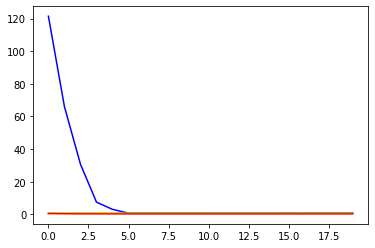

In [19]:
import matplotlib.pyplot as plt
plt.plot(batchTraininglog.history['loss'], color = 'blue')
plt.plot(stochasticTraininglog.history['loss'], color = 'green')
plt.plot(batchTraininglog2.history['loss'], color = 'yellow')
plt.plot(stochasticTraininglog2.history['loss'], color = 'red')

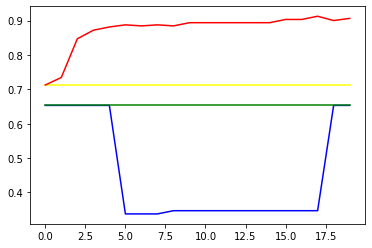

In [20]:
plt.plot(batchTraininglog.history['accuracy'], color = 'blue')
plt.plot(stochasticTraininglog.history['accuracy'], color = 'green')
plt.plot(batchTraininglog2.history['accuracy'], color = 'yellow')
plt.plot(stochasticTraininglog2.history['accuracy'], color = 'red')